# Self Organizing Maps

In [22]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as pltb
import pandas as pd

In [23]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [24]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [25]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

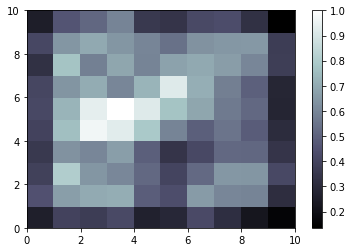

In [26]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

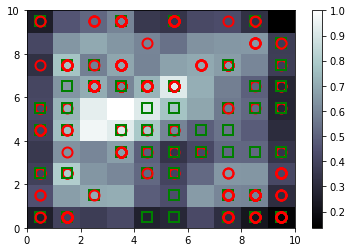

In [27]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [28]:
# Finding the frauds
mappings = som.win_map(X)
mappings[(9,0)]

[array([0.50077484, 1.        , 0.21052632, 0.04607143, 0.5       ,
        0.23076923, 0.875     , 0.00877193, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.07      , 0.        ]),
 array([0.15204081, 1.        , 0.10406015, 0.02982143, 0.        ,
        0.53846154, 0.375     , 0.07017544, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.12      , 0.        ]),
 array([3.73949361e-01, 1.00000000e+00, 8.15037594e-02, 0.00000000e+00,
        0.00000000e+00, 4.61538462e-01, 5.00000000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 2.50000000e-01, 1.00000000e-05]),
 array([0.12193618, 1.        , 0.40857143, 0.01785714, 0.        ,
        0.46153846, 0.375     , 0.01754386, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.065     , 0.        ]),
 array([0.26323334, 1.        , 0.16165414, 0.47625   , 0.        ,
        0.38461538, 0.375     , 0.001403

In [36]:
frauds = np.concatenate((mappings[(0,4)], mappings[(1,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])


15686461.0
15680643.0
15668830.0
15796569.0
15805212.0
15712877.0
15691150.0
15807546.0
15773869.0
15796111.0
15809800.0
15676909.0
15802071.0
15750055.0
15679801.0
15748499.0
15732943.0
15781975.0
15770255.0
15773789.0
15794868.0
15705506.0
15812470.0
15788215.0
15722535.0
15635598.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


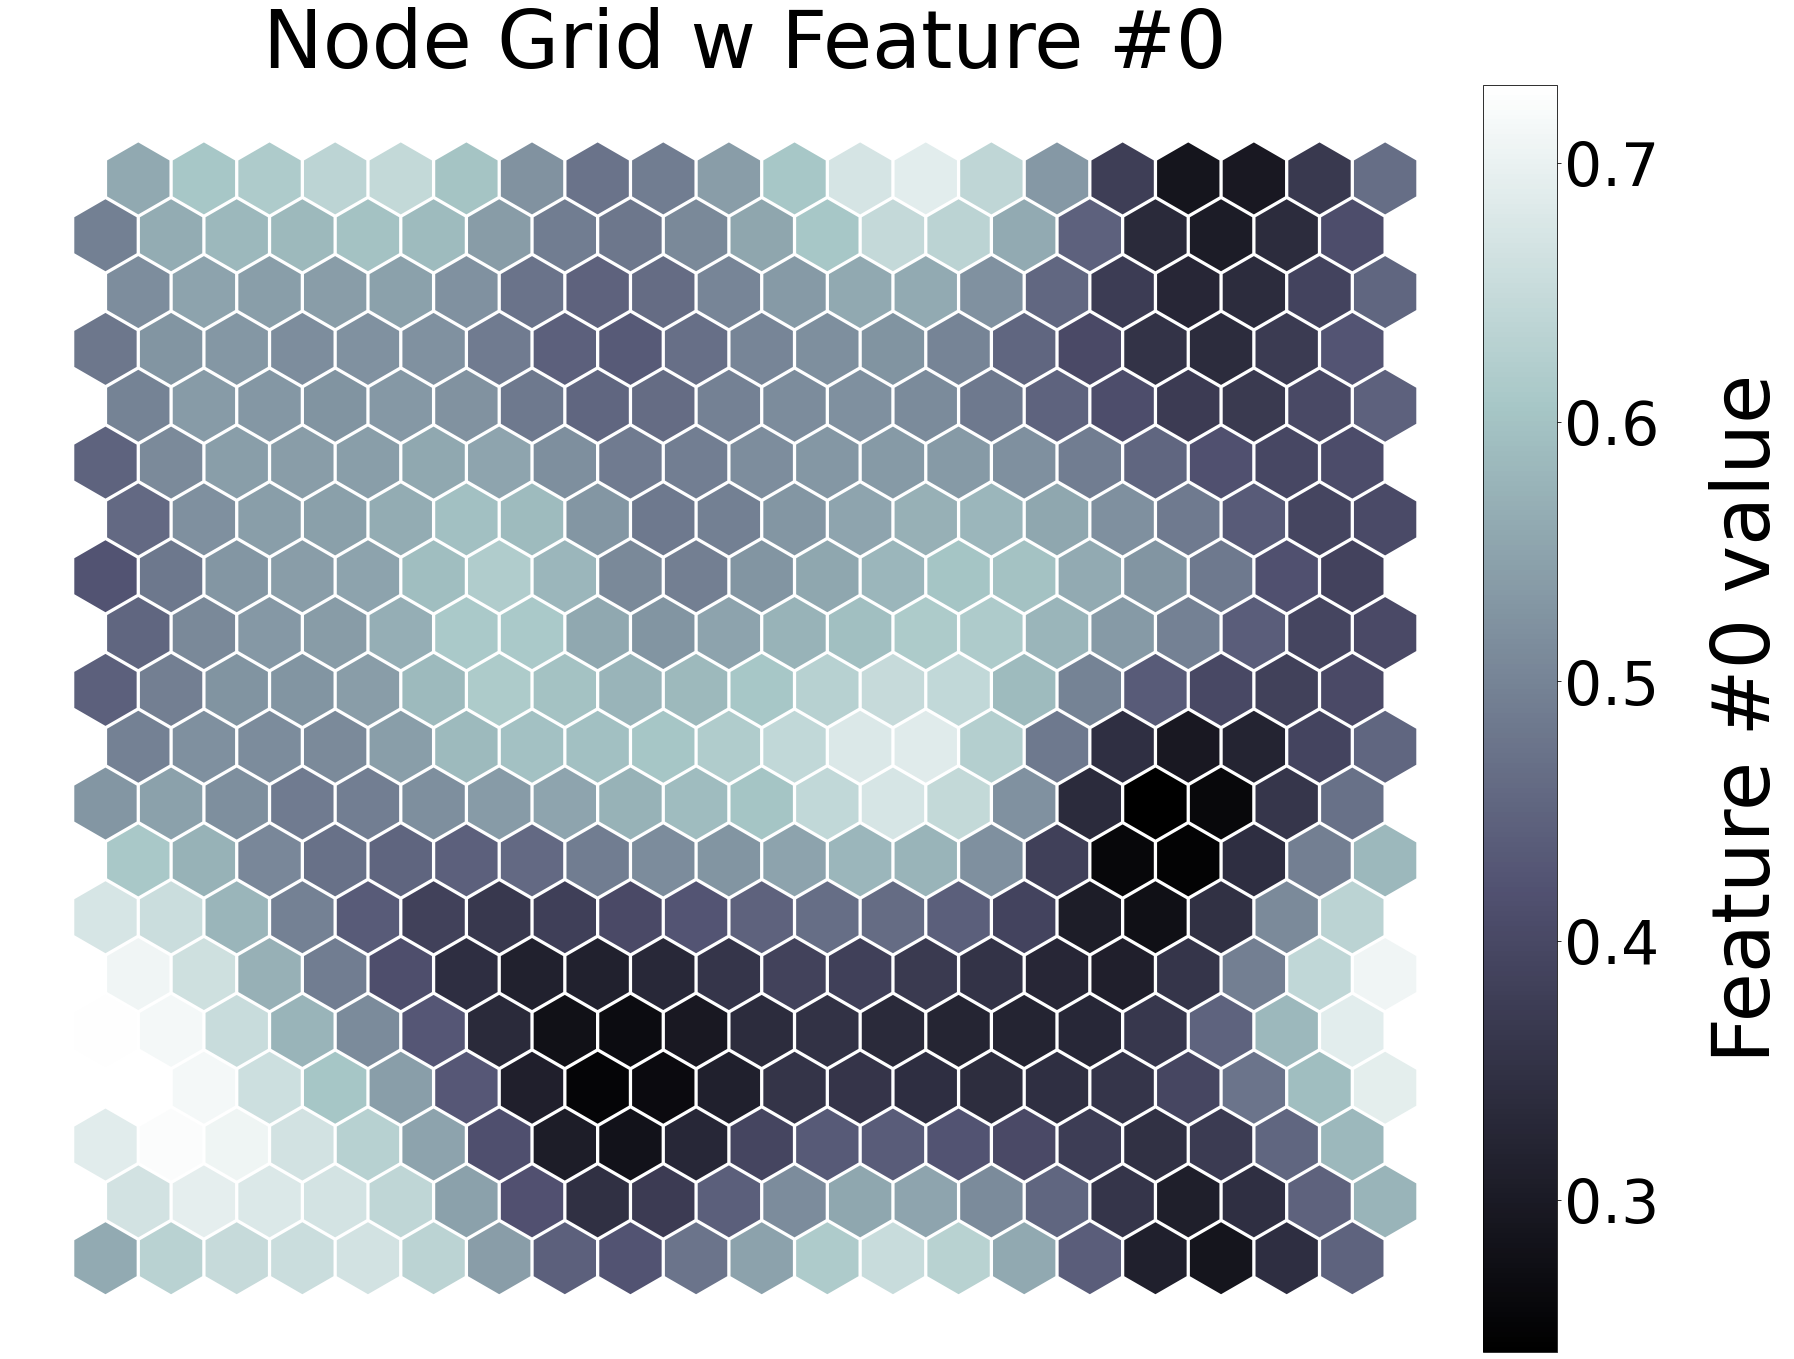

In [37]:
#import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
#import numpy as np

net = sps.somNet(20, 20, X, PBC=True)
net.train(0.05, 10000)
net.save('filename_weights')
net.nodes_graph(colnum=0)

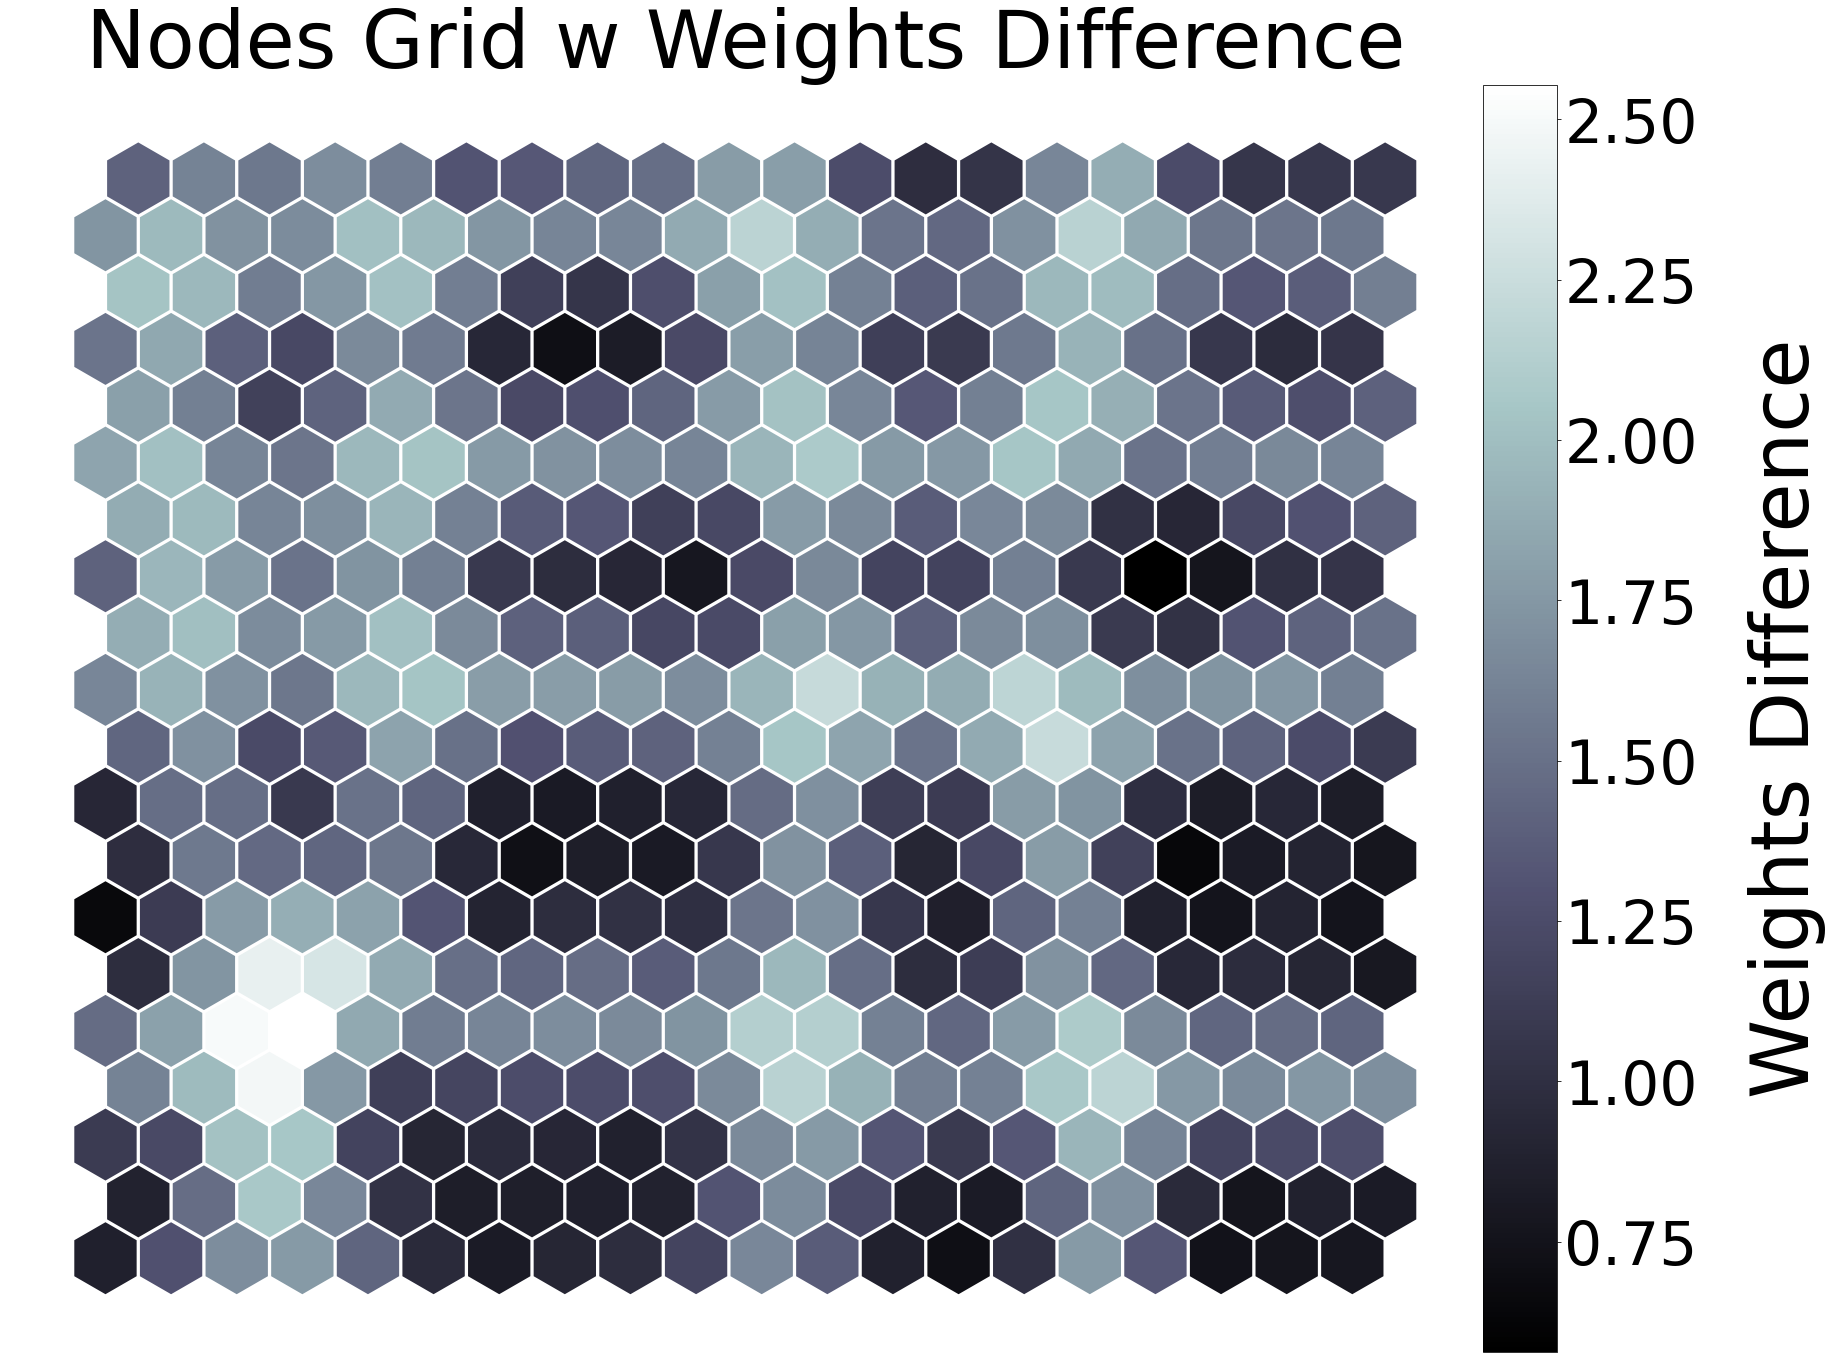

In [38]:
net.diff_graph()

In [39]:
#Project the datapoints on the new 2D network map.
net.project(X)

[[1, 1.7320508075688776],
 [15, 10.392304845413264],
 [19, 13.856406460551021],
 [6, 13.856406460551021],
 [6, 6.9282032302755105],
 [9, 10.392304845413264],
 [0.5, 6.062177826491071],
 [9, 10.392304845413264],
 [19, 6.9282032302755105],
 [6, 13.856406460551021],
 [8.5, 0.8660254037844388],
 [9, 1.7320508075688776],
 [8, 1.7320508075688776],
 [9, 0.0],
 [16.5, 16.454482671904337],
 [0, 6.9282032302755105],
 [5.5, 0.8660254037844388],
 [6, 10.392304845413264],
 [19.5, 6.062177826491071],
 [7, 10.392304845413264],
 [17, 10.392304845413264],
 [13, 13.856406460551021],
 [0, 6.9282032302755105],
 [13, 6.9282032302755105],
 [17, 6.9282032302755105],
 [9, 0.0],
 [19, 6.9282032302755105],
 [8, 1.7320508075688776],
 [7, 10.392304845413264],
 [6.5, 0.8660254037844388],
 [8.5, 0.8660254037844388],
 [16, 13.856406460551021],
 [11, 1.7320508075688776],
 [8, 1.7320508075688776],
 [2.5, 16.454482671904337],
 [2, 8.660254037844387],
 [13.5, 0.8660254037844388],
 [5.5, 2.598076211353316],
 [6, 13.85640

<Figure size 432x288 with 0 Axes>

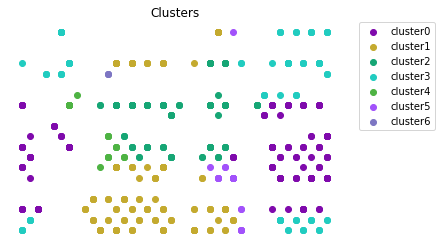

[[0,
  6,
  8,
  15,
  18,
  20,
  22,
  24,
  26,
  35,
  44,
  46,
  47,
  48,
  51,
  52,
  53,
  57,
  63,
  68,
  72,
  75,
  77,
  78,
  82,
  83,
  85,
  89,
  91,
  92,
  94,
  95,
  97,
  104,
  107,
  110,
  122,
  125,
  127,
  131,
  132,
  133,
  134,
  135,
  136,
  141,
  150,
  152,
  153,
  155,
  156,
  157,
  160,
  167,
  168,
  180,
  185,
  187,
  193,
  197,
  201,
  206,
  212,
  216,
  217,
  218,
  221,
  224,
  226,
  236,
  237,
  244,
  249,
  250,
  253,
  259,
  260,
  270,
  271,
  272,
  280,
  281,
  284,
  288,
  289,
  295,
  297,
  301,
  303,
  310,
  315,
  318,
  323,
  326,
  328,
  333,
  337,
  344,
  349,
  351,
  354,
  357,
  359,
  366,
  371,
  372,
  374,
  377,
  378,
  382,
  383,
  391,
  394,
  398,
  400,
  403,
  404,
  407,
  409,
  410,
  411,
  418,
  421,
  422,
  424,
  431,
  442,
  444,
  447,
  448,
  450,
  452,
  455,
  462,
  473,
  474,
  476,
  482,
  489,
  492,
  494,
  500,
  501,
  506,
  507,
  508,
  510,
  511,


<Figure size 432x288 with 0 Axes>

In [40]:
#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(X, type='qthresh', show=True)